# Trabajo Práctico Final de Fundamentos de Ciencia de Datos - TUIA

### Descripción: 
Este estudio se centra en el análisis de los datos de las elecciones generales de 2023 y los resultados del censo de 2022, con el objetivo de responder a la pregunta:

¿Podemos predecir la participación en futuras elecciones basándonos en tendencias electorales anteriores y factores socioeconómicos?

Este análisis se llevará acabó en la provincia de Santa Fe por departamento y solo con los cargos de Presidente y Vicepresidente. 

### Fuente: 
Dataset de los resultados de las elecciones: 
    https://datos.gob.ar/dataset/dine-resultados-provisionales-elecciones-2023/archivo/dine_9.2

Resultados de las elecciones: 
    https://resultados.gob.ar/elecciones/1/21/1/-1/-1/Santa-Fe

Dataset de los resultados definitivos del Censo 2022:
    https://censo.gob.ar/index.php/datos_definitivos_santafe/

# Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import re # Importamos el módulo 're' para trabajar con expresiones regulares

# PARTE 1

## Dataset elecciones generales 2023

### Carga de datos

In [2]:
Resultados = pd.read_csv('Datasets\Resultados_Electorales_Generales_2023.csv')

C:\Users\src4\AppData\Local\Temp\ipykernel_18096\2190640317.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  Resultados = pd.read_csv('Datasets\Resultados_Electorales_Generales_2023.csv')


### Previsualización de los datos

#### Visualizamos el dataset completo para hacer una idea inicial 


In [3]:
Resultados

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868097,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,0,NaN,0.0,NaN,COMANDO,0
5868098,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10802,UNION POR LA PATRIA,NaN,NaN,POSITIVO,40
5868099,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10803,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,22
5868100,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10801,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,18


#### Vemos que hay 5 millones 868 mil 102 filas y 23 columnas, de las cuales hay varias que no se muestran y pueden llegar a ser de interés; sin embargo, como a nosotros solo nos interesa la provincia de Santa Fe y los votos de presidente y vicepresidente filtramos y creamos un nuevo DataFrame  con base en esto. 

In [4]:
Resultados_filtrado = Resultados[(Resultados.distrito_nombre == 'Santa Fe') & (Resultados.cargo_nombre == 'PRESIDENTE Y VICE')].copy()
Resultados_filtrado

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
588554,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,12,9 de Julio,...,NATIVOS,354,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
588555,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,12,9 de Julio,...,NATIVOS,354,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
588556,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,12,9 de Julio,...,NATIVOS,354,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
588557,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,12,9 de Julio,...,NATIVOS,354,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,2
588558,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,12,9 de Julio,...,NATIVOS,351,1,PRESIDENTE Y VICE,135,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740422,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,1,La Capital,...,NATIVOS,354,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
5740423,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,1,La Capital,...,NATIVOS,351,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
5740424,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,1,La Capital,...,NATIVOS,353,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,EN BLANCO,0
5758606,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,1,La Capital,...,NATIVOS,354,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,4


#### Si bien nuestros datos se redujeron considerablemente para yo poder tener una mejor comprensión de estos, use como ejemplo la mesa donde yo vote que es la numero 7407 de Venado Tuerto que queda en el departamento General López

In [5]:
Resultados[(Resultados.distrito_nombre == 'Santa Fe') & (Resultados.seccion_nombre == 'General López') & (Resultados.mesa_id == 7407) & (Resultados.cargo_nombre == 'PRESIDENTE Y VICE')]

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
1082539,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,132,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,101
1082540,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,135,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,74
1082541,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,50
1082542,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,133,HACEMOS POR NUESTRO PAIS,NaN,NaN,POSITIVO,31
1082543,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,NaN,NaN,POSITIVO,6
1082544,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,EN BLANCO,3
1082545,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,5
1082546,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
1082547,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
1082548,2023,GENERAL,PROVISORIO,NORMAL,21,Santa Fe,0,NaN,16,General López,...,NATIVOS,352,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0


#### Vemos como las filas se redujeron aún más hasta solo quedarnos 10, lo cual permite una comprensión mucho más profunda sobre el dataset, sin embargo, todavía hay varias columnas que no se muestran, por lo tanto, vamos a tener que trabajar en ello

#### Todas las `mesa_id` tiene 10 filas

In [6]:
# Agrupar por mesa_id y contar el número de filas por grupo
conteo_filas = Resultados_filtrado.groupby('mesa_id').size()
    
# Verificar si todas las mesas tienen 10 filas
if all(conteo_filas == 10):
    print(True)
else:
    print(False)

True


### Columnas

####  Primero veamos todas las columnas existentes 

In [7]:
Resultados_filtrado.columns

Index(['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id',
       'distrito_nombre', 'seccionprovincial_id', 'seccionprovincial_nombre',
       'seccion_id', 'seccion_nombre', 'circuito_id', 'circuito_nombre',
       'mesa_id', 'mesa_tipo', 'mesa_electores', 'cargo_id', 'cargo_nombre',
       'agrupacion_id', 'agrupacion_nombre', 'lista_numero', 'lista_nombre',
       'votos_tipo', 'votos_cantidad'],
      dtype='object')

#### Hay varias columnas que no nos interesan como el año o como `eleccion_tipo` entre otras, ya que son redundantes para lo que:

In [8]:
# Crea un nuevo DataFrame sin las columnas no deseadas
Resultados_fix = Resultados_filtrado.drop([
        'año', 
        'eleccion_tipo', 
        'recuento_tipo', 
        'padron_tipo', 
        'distrito_id',
        'seccionprovincial_id', 
        'seccionprovincial_nombre',
        'seccion_id', 
        'circuito_id', 
        'circuito_nombre',
        'mesa_tipo', 
        'cargo_id', 
        'agrupacion_id', 
        'agrupacion_nombre', 
        'lista_numero', 
        'lista_nombre',
        'votos_tipo'
        ], axis=1)

##### Veamos como queda el resultado

In [9]:
Resultados_fix

,distrito_nombre,seccion_nombre,mesa_id,mesa_electores,cargo_nombre,votos_cantidad
588554,Santa Fe,9 de Julio,3532,354,PRESIDENTE Y VICE,0
588555,Santa Fe,9 de Julio,3532,354,PRESIDENTE Y VICE,0
588556,Santa Fe,9 de Julio,3532,354,PRESIDENTE Y VICE,0
588557,Santa Fe,9 de Julio,3532,354,PRESIDENTE Y VICE,2
588558,Santa Fe,9 de Julio,3533,351,PRESIDENTE Y VICE,94
...,...,...,...,...,...,...
5740422,Santa Fe,La Capital,909,354,PRESIDENTE Y VICE,0
5740423,Santa Fe,La Capital,443,351,PRESIDENTE Y VICE,0
5740424,Santa Fe,La Capital,447,353,PRESIDENTE Y VICE,0
5758606,Santa Fe,La Capital,1039,354,PRESIDENTE Y VICE,4


##### Vemos como ahora ya podemos ver todas las columnas y tenemos el dataset mas limpio

### Filas

#### Necesito un DataFrame que muestre la cantidad total de votos para el cargo de presidente y vicepresidente en cada sección del distrito Santa Fe. 

#### Para lo que:
#### Primero, agrupo el DataFrame por la columna `seccion_nombre`.
#### Luego, selecciono la columna `votos_cantidad` y sumo los valores para cada sección.
#### Después, renombro la serie resultante a `votos_cantidad`.
#### Finalmente, restablezco el índice del DataFrame resultante para que `seccion_nombre` ya no sea el índice y así volver la columna por la que agrupe una columna regular.

In [10]:
# votos_cantidad
votos_cantidad = Resultados_fix.groupby('seccion_nombre')['votos_cantidad'].sum().rename('votos_cantidad').reset_index()
votos_cantidad

,seccion_nombre,votos_cantidad
0,9 de Julio,18226
1,Belgrano,30302
2,Caseros,54979
3,Castellanos,113988
4,Constitución,59210
5,Garay,13639
6,General López,125654
7,General Obligado,113662
8,Iriondo,45716
9,La Capital,314516


#### Necesito también un DataFrame que muestre la cantidad total de votos del padrón, es decir, la cantidad de votos total que se esperaba que haya como máximo para el cargo de presidente y vicepresidente en cada sección del distrito Santa Fe. 

#### Para lo que: 

#### Primero, hay que eliminar las filas duplicadas basándose en la columna `mesa_id`. Esto puedo hacerlo a través de un drop_duplicates() como lo hago o dividiendo el resultado final por 10, ya que como visualizamos en la sesión de Previsualización de los datos, cada `mesa_id` tiene 10 filas siempre lo que nos lleva a que al querer sumar la cantidad de votos totales esperados del padrón nos dé un número muy inflado porque se sumaría más de 1 vez por `mesa_id` porque es un dato que se repite por fila en la columna `mesa_electores`.

#### Luego, agrupo el DataFrame resultante por la columna `seccion_nombre`.

#### Después, selecciono la columna `mesa_electores` y sumo los valores para cada sección. 

#### Finalmente, renombro la serie resultante a `votos_padron` y restablezco el índice.

In [11]:
# votos_padron                                                                
votos_padron = Resultados_fix.drop_duplicates(subset='mesa_id').groupby('seccion_nombre')['mesa_electores'].sum().rename('votos_padron').reset_index()
votos_padron

,seccion_nombre,votos_padron
0,9 de Julio,26821
1,Belgrano,39428
2,Caseros,72338
3,Castellanos,150951
4,Constitución,76806
5,Garay,19909
6,General López,166983
7,General Obligado,154178
8,Iriondo,59844
9,La Capital,457995


#### Unimos los DataFrame `votos_cantidad` con votos_padron en un nuevo DataFrame en el cual además cálculo y añado la columna `porcentaje_votos` donde irá el valor correspondiente al porcentaje que se votó, es decir que si de 10 personas votaron 8 entonces voto el 80%

In [12]:
# Unimos las tablas votos_cantidad y votos_padron
Elecciones = votos_cantidad.merge(votos_padron, on='seccion_nombre')

# Reemplazar espacios por guiones bajos en la columna 'seccion_nombre'
Elecciones['seccion_nombre'] = Elecciones['seccion_nombre'].str.replace(' ', '_')

# Set the 'seccion_nombre' column as the index
Elecciones.set_index('seccion_nombre', inplace=True)

# Creamos una nueva columna con el porcentaje de votos donde el 2 es la cantidad de decimales
Elecciones['porcentaje_votos'] = round((Elecciones['votos_cantidad'] / Elecciones['votos_padron']) * 100, 2)

Elecciones

,votos_cantidad,votos_padron,porcentaje_votos
seccion_nombre,,,
9_de_Julio,18226,26821,67.95
Belgrano,30302,39428,76.85
Caseros,54979,72338,76.00
Castellanos,113988,150951,75.51
Constitución,59210,76806,77.09
Garay,13639,19909,68.51
General_López,125654,166983,75.25
General_Obligado,113662,154178,73.72
Iriondo,45716,59844,76.39


## Dataset censo 2022

### Definimos un objeto capaz de cargar todos nuestros Datasets

#### TAD: DataFrame

#### Operaciones:

`__init__`: Inicializa un objeto DataFrame. Toma como entrada una ruta a un archivo Excel y carga los datos de ese archivo.

`get_data_excel`: Lee el archivo Excel en la ruta especificada y obtiene los nombres de las hojas en el archivo. Devuelve una lista de los nombres de las hojas y el objeto pandas ExcelFile que representa el archivo Excel.

`create_raw_dataframes`: Crea una lista de dataframes a partir de las hojas del archivo Excel. Cada dataframe contiene los datos de una hoja.

`process_dataframes`: Procesa los dataframes creados por `create_raw_dataframes`. Realiza varias operaciones de limpieza y transformación en los dataframes. Devuelve un diccionario de dataframes procesados y una lista de nombres de departamentos.

`create_dataframe`: Crea un dataframe final a partir de los dataframes procesados. El dataframe final tiene una fila para cada departamento y una columna para cada sección. Los valores son los valores de las secciones para cada departamento.

In [13]:
class DataFrame:
    def __init__(self, path):
        # 'path' es la ruta al archivo Excel que se va a procesar.
        self.path = path 
        
        # Se llama al método 'get_data_excel' del objeto. Este método se encarga de abrir el archivo Excel 
        # y obtener los nombres de las hojas y el objeto del archivo Excel. 
        # Los resultados se asignan a los atributos 'sheet_names' y 'excel_file' del objeto.
        self.sheet_names, self.excel_file = self.get_data_excel()
        
        # Se llama al método 'create_raw_dataframes' del objeto. Este método se encarga de crear dataframes 
        # a partir de las hojas del archivo Excel. 
        # Los dataframes creados se asignan al atributo 'raw_dataframes' del objeto.
        self.raw_dataframes = self.create_raw_dataframes()
        
        # Se llama al método 'process_dataframes' del objeto. Este método se encarga de procesar los dataframes 
        # creados anteriormente (por ejemplo, limpiar los datos, transformar los datos, etc.). 
        # Los dataframes procesados y los nombres de los departamentos se asignan a los atributos 'dataframes' 
        # y 'departamentos' del objeto.
        self.dataframes, self.departamentos = self.process_dataframes()
    
    def get_data_excel(self):
        # Se utiliza la función ExcelFile de pandas para leer el archivo Excel en la ruta especificada por 'self.path'.
        # 'excel_file' es un objeto de pandas ExcelFile que representa el archivo Excel.
        excel_file = pd.ExcelFile(self.path)
        
        # Se obtienen los nombres de las hojas del archivo Excel utilizando el atributo 'sheet_names' del objeto 'excel_file'.
        # 'sheet_names' es una lista de cadenas que contiene los nombres de las hojas en el archivo Excel.
        sheet_names = excel_file.sheet_names
        
        # Se devuelven los nombres de las hojas y el objeto del archivo Excel.
        # Esto permitirá que otros métodos del objeto accedan a estas informaciones.
        return sheet_names, excel_file
    
    def create_raw_dataframes(self):
        # Se inicializa una lista vacía 'raw_dataframes' para almacenar los dataframes que se crearán a partir de las hojas del archivo Excel.
        raw_dataframes = []
        
        # Se itera sobre cada nombre de hoja en 'self.sheet_names'.
        for sheet_name in self.sheet_names:
            # Se utiliza la función 'read_excel' de pandas para leer los datos de la hoja actual del archivo Excel.
            # 'self.path' es la ruta al archivo Excel, 'sheet_name' es el nombre de la hoja actual y 'skiprows=1' indica que se debe omitir la primera fila de la hoja (generalmente, la fila de encabezados).
            # 'sheet_data' es un dataframe de pandas que contiene los datos de la hoja actual.
            sheet_data = pd.read_excel(self.path, sheet_name=sheet_name, skiprows=1)
            
            # Se añade el dataframe 'sheet_data' a la lista 'raw_dataframes'.
            raw_dataframes.append(sheet_data)
        
        # Se devuelve la lista 'raw_dataframes', que contiene un dataframe para cada hoja en el archivo Excel.
        return raw_dataframes
    
    def process_dataframes(self):
        # Se inicializa un diccionario vacío 'dataframes' para almacenar los dataframes procesados.
        # Se inicializa una lista vacía 'departamentos' para almacenar los nombres de los departamentos.
        dataframes = {}
        departamentos = []
        
        # Iteramos sobre cada dataframe en la lista de dataframes sin limpiar. 
        # El rango es len(self.raw_dataframes)-3 porque las primeras 3 hojas no tienen información relevante, es decir, que vamos a hacer index + 3 y encesitamos acortar la longitud del rango en 3 para compensar
        for dataframe in range(len(self.raw_dataframes)-3):
            index = dataframe+3
            # Obtenemos el nombre de la columna en la posición 0 del dataframe sin limpiar
            column_name = self.raw_dataframes[index].columns[0]
            # Utilizamos una expresión regular para buscar la palabra 'departamento' seguida de un espacio y luego capturar el texto que viene después hasta el primer punto
            resultado = re.search(r'departamento\s(.*?)\.', column_name)
            
            if resultado:
                if self.sheet_names[2] == 'Cuadro\xa02.21':
                    # Se extrae el nombre del departamento del resultado de la expresión regular.
                    palabra = resultado.group(1)
                    # Se añade el nombre del departamento a la lista 'departamentos'.
                    departamentos.append(palabra)
                    
                    # Creamos una copia del dataframe en la posición index (dataframe actual) para no modificar el original en caso de que lo necesitemos mas adelante o para no tener que volver a cargar todo en caso de un error
                    df_temp = self.raw_dataframes[index].copy()
                    
                    # Se asignan los valores de la primera fila (índice 0) de las dos primeras columnas al segundo renglón (índice 1) de las dos primeras columnas.
                    df_temp.iloc[1, :2] = df_temp.iloc[0, :2]

                    # Se actualiza 'df_temp' para incluir todas las filas excepto la primera (índice 0).
                    df_temp = df_temp.iloc[1:]

                    # Se actualizan los nombres de las columnas de 'df_temp' para ser los valores de la primera fila (ahora índice 0 después de la operación anterior).
                    df_temp.columns = df_temp.iloc[0]

                    # Se actualiza 'df_temp' para incluir todas las columnas excepto las últimas tres.
                    df_temp = df_temp.iloc[:, :-3]

                    # Se actualiza 'df_temp' para incluir todas las filas excepto la primera y las dos últimas.
                    df_temp = df_temp.iloc[1:-2]
        
                    # Guardamos el dataframe en el diccionario utilizando la variable 'palabra' como clave
                    dataframes[palabra] = df_temp
                elif self.sheet_names[2] == 'Cuadro\xa07.21':
                    palabra = resultado.group(1)
                    departamentos.append(palabra)
                    
                    # Creamos una copia del dataframe en la posición index (dataframe actual) para no modificar el original en caso de que lo necesitemos mas adelante o para no tener que volver a cargar todo en caso de un error
                    df_temp = self.raw_dataframes[index].copy()
                    
                    # Cambiamos el nombre de las columnas por la fila 0
                    df_temp.columns = df_temp.iloc[0]
                    # Eliminamos las filas 0 y 1
                    df_temp = df_temp.iloc[2:-2]
                    # Eliminamos las columnas que no necesitamos
                    df_temp = df_temp.iloc[:, :-6]
                    
                    # Guardamos el dataframe en el diccionario utilizando la variable 'palabra' como clave
                    dataframes[palabra] = df_temp
                
                elif self.sheet_names[2] == 'Cuadro\xa01.21':
                    palabra = resultado.group(1)
                    departamentos.append(palabra)

                    # Creamos una copia del dataframe en la posición index (dataframe actual) para no modificar el original en caso de que lo necesitemos mas adelante o para no tener que volver a cargar todo en caso de un error
                    df_temp = self.raw_dataframes[index].copy()
                    
                    df_temp.iloc[1, :2] = df_temp.iloc[0, :2]
                    df_temp = df_temp.iloc[1:]
                    df_temp.columns = df_temp.iloc[0] 
                    df_temp = df_temp.iloc[1:-2]
                    
                    # Guardamos el dataframe en el diccionario utilizando la variable 'palabra' como clave
                    dataframes[palabra] = df_temp
                    

        return dataframes, departamentos  
    
    def create_dataframe(self):
        # Se obtienen los nombres de las filas del segundo dataframe en 'self.dataframes' (índice 1 en 'self.departamentos') y se convierten en una lista.
        name_rows = self.dataframes[self.departamentos[1]].iloc[:, 0].tolist()
        
        # Se convierten todos los nombres de las filas a minúsculas y se reemplazan los espacios por guiones bajos.
        name_rows = [item.lower().replace(' ', '_') for item in name_rows]
        
        # Se crea un nuevo dataframe vacío con los nombres de las filas como nombres de las columnas.
        dataframe = pd.DataFrame(columns=name_rows)

        # Se itera sobre cada departamento en 'self.departamentos'.
        for departamento in self.departamentos:
            # Obtenemos el dataframe correspondiente al departamento
            df_departamento = self.dataframes[departamento]

            # Obtenemos los valores de las filas como una lista
            values = df_departamento.iloc[:, 1].tolist()

            # Añadimos una nueva fila al dataframe con los valores y el nombre del departamento como índice
            dataframe.loc[departamento] = values
            
        # Se renombra el índice del dataframe a 'seccion_nombre'.
        dataframe = dataframe.rename_axis('seccion_nombre', axis='index')
        
        # Se obtiene una lista de los índices del dataframe.
        index_list = dataframe.index.tolist()
        
        # Se itera sobre cada índice en la lista.
        for index in index_list:
            if '\xa0' in index:
                # Si el índice contiene el carácter '\xa0'(es un espacio), se reemplaza por un guión bajo.
                new_index = index.replace('\xa0', '_')
                
                # Se renombra el índice en el dataframe.
                dataframe.rename(index={index: new_index}, inplace=True)
        
        # Se devuelve el dataframe.
        return dataframe    

### Carga de datos

#### Se crean los objeto 'DataFrame' llamado 'Tenencia_Internet', 'Materiales_Predominante' y 'Procedencia_Agua' a partir del archivo Excel en las rutas correspondientes a cada uno

In [14]:
Tenencia_Internet = DataFrame('Datasets\Tenencia_Internet.xlsx')
Materiales_Predominante = DataFrame('Datasets\Materiales_Predominante.xlsx')
Procedencia_Agua = DataFrame('Datasets\Procedencia_Agua.xlsx')

#### Se llama al método 'create_dataframe' de los objetos 'Tenencia_Internet' para crear un nuevo dataframe. Luego se hace una copia del dataframe resultante para evitar modificar el dataframe original en operaciones futuras y evitar tener que llamar al método cada vez que se quiera manipular el dataframe.

In [15]:
Internet = Tenencia_Internet.create_dataframe().copy()

In [16]:
Agua = Procedencia_Agua.create_dataframe().copy()

In [17]:
Materiales = Materiales_Predominante.create_dataframe().copy()

### Visualización de los DataFrames 

In [18]:
Internet

,total,tiene_celular_con_internet,no_tiene_celular_con_internet
seccion_nombre,,,
Belgrano,48544,44861,3683
Caseros,86261,78602,7659
Castellanos,189464,176098,13366
Constitución,93000,84154,8846
Garay,24853,21300,3553
General_López,200455,184015,16440
General_Obligado,197533,172410,25123
Iriondo,73636,67275,6361
La_Capital,568259,519099,49160


In [19]:
Agua

,total,red_pública_(agua_corriente),perforación_con_bomba_a_motor,perforación_con_bomba_manual,pozo_sin_bomba,"transporte_por_cisterna,_agua_de_lluvia,_río,_canal,_arroyo_o_acequia",otra_procedencia
seccion_nombre,,,,,,,
Belgrano,48544,41835,5129,191,139,79,1171
Caseros,86261,72795,8345,252,203,93,4573
Castellanos,189464,152195,26267,861,669,640,8832
Constitución,93000,88370,2785,262,136,106,1341
Garay,24853,13443,9498,1468,113,22,309
General_López,200455,119526,66951,1922,711,403,10942
General_Obligado,197533,161291,26944,4670,979,717,2932
Iriondo,73636,63908,5652,291,165,164,3456
La_Capital,568259,487404,64046,3529,1617,1364,10299


In [20]:
Materiales

,total,"baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_con_revestimiento_interior_o_cielorraso","baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso",losa_o_carpeta_a_la_vista_(sin_cubierta)_con_revestimiento_interior_o_cielorraso,losa_o_carpeta_a_la_vista_(sin_cubierta)_sin_revestimiento_interior_o_cielorraso,chapa_de_metal_con_revestimiento_interior_o_cielorraso,chapa_de_metal_sin_revestimiento_interior_o_cielorraso,"chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso","chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso",otro_material_con_cielorraso,otro_material_sin_cielorraso,cielorraso_ignorado
seccion_nombre,,,,,,,,,,,,
Belgrano,48544,14011,4905,5140,4950,12415,4378,155,38,770,509,1273
Caseros,86261,24597,9514,8553,8460,20893,9646,222,139,1249,917,2071
Castellanos,189464,35269,6025,21053,12192,89748,16090,797,342,2906,775,4267
Constitución,93000,19975,8245,10500,11377,23598,13947,188,468,1091,685,2926
Garay,24853,1007,94,423,195,13915,7509,123,705,314,103,465
General_López,200455,38212,11211,25208,21936,72019,19817,725,415,3444,1889,5579
General_Obligado,197533,17414,1271,11228,2845,110495,41334,713,2484,2321,1271,6157
Iriondo,73636,20510,7930,6284,6089,19633,8294,262,216,1237,983,2198
La_Capital,568259,89698,4275,71013,11425,259000,103383,1929,1767,8648,1673,15448


## Merge dataset

### Procesamiento de los DataFrames

#### Unimos el dataset de las elecciones con los del censo basándose en los índices de ambos DataFrames y usando la opción `how=left` para conservar todas las filas de `Elecciones` (el DataFrame de la izquierda), incluso si no hay una fila correspondiente en los DataFrames de la derecha.


In [21]:
data = pd.merge(Elecciones, Internet, left_index = True, right_index = True, how='left')
data = pd.merge(data, Agua, left_index = True, right_index = True, how='left')
data = pd.merge(data, Materiales, left_index = True, right_index = True, how='left')


#### Visualizamos como queda

In [22]:
data

,votos_cantidad,votos_padron,porcentaje_votos,total_x,tiene_celular_con_internet,no_tiene_celular_con_internet,total_y,red_pública_(agua_corriente),perforación_con_bomba_a_motor,perforación_con_bomba_manual,...,"baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso",losa_o_carpeta_a_la_vista_(sin_cubierta)_con_revestimiento_interior_o_cielorraso,losa_o_carpeta_a_la_vista_(sin_cubierta)_sin_revestimiento_interior_o_cielorraso,chapa_de_metal_con_revestimiento_interior_o_cielorraso,chapa_de_metal_sin_revestimiento_interior_o_cielorraso,"chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso","chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso",otro_material_con_cielorraso,otro_material_sin_cielorraso,cielorraso_ignorado
seccion_nombre,,,,,,,,,,,,,,,,,,,,,
9_de_Julio,18226,26821,67.95,30942,26572,4370,30942,11603,1873,394,...,323,953,549,18523,6742,152,173,608,215,574
Belgrano,30302,39428,76.85,48544,44861,3683,48544,41835,5129,191,...,4905,5140,4950,12415,4378,155,38,770,509,1273
Caseros,54979,72338,76.00,86261,78602,7659,86261,72795,8345,252,...,9514,8553,8460,20893,9646,222,139,1249,917,2071
Castellanos,113988,150951,75.51,189464,176098,13366,189464,152195,26267,861,...,6025,21053,12192,89748,16090,797,342,2906,775,4267
Constitución,59210,76806,77.09,93000,84154,8846,93000,88370,2785,262,...,8245,10500,11377,23598,13947,188,468,1091,685,2926
Garay,13639,19909,68.51,24853,21300,3553,24853,13443,9498,1468,...,94,423,195,13915,7509,123,705,314,103,465
General_López,125654,166983,75.25,200455,184015,16440,200455,119526,66951,1922,...,11211,25208,21936,72019,19817,725,415,3444,1889,5579
General_Obligado,113662,154178,73.72,197533,172410,25123,197533,161291,26944,4670,...,1271,11228,2845,110495,41334,713,2484,2321,1271,6157
Iriondo,45716,59844,76.39,73636,67275,6361,73636,63908,5652,291,...,7930,6284,6089,19633,8294,262,216,1237,983,2198


### Procesamiento del DataFrame 

#### Continuando con la visualización anterior vemos que hay columnas que no podemos ver por lo que:

In [23]:
data.columns

Index(['votos_cantidad', 'votos_padron', 'porcentaje_votos', 'total_x',
       'tiene_celular_con_internet', 'no_tiene_celular_con_internet',
       'total_y', 'red_pública_(agua_corriente)',
       'perforación_con_bomba_a_motor', 'perforación_con_bomba_manual',
       'pozo_sin_bomba',
       'transporte_por_cisterna,_agua_de_lluvia,_río,_canal,_arroyo_o_acequia',
       'otra_procedencia', 'total',
       'baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_con_revestimiento_interior_o_cielorraso',
       'baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso',
       'losa_o_carpeta_a_la_vista_(sin_cubierta)_con_revestimiento_interior_o_cielorraso',
       'losa_o_carpeta_a_la_vista_(sin_cubierta)_sin_revestimiento_interior_o_cielorraso',
       'chapa_de_metal_con_revestimiento_interior_o_cielorraso',
       'chapa_de_metal_sin_revestimiento_interior_o_cielorraso',
       'chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_

#### Calculamos el porcentaje de todas las columnas

In [24]:
# Internete 
data['porcentaje_tiene_celular_con_internet'] = round((data['tiene_celular_con_internet'] / data['total']) * 100, 2)
data['porcentaje_no_tiene_celular_con_internet'] = round((data['no_tiene_celular_con_internet'] / data['total']) * 100, 2)

# Agua
data['porcentaje_red_pública_agua_corriente'] = round((data['red_pública_(agua_corriente)'] / data['total']) * 100, 2)
data['porcentaje_perforación_con_bomba_a_motor'] = round((data['perforación_con_bomba_a_motor'] / data['total']) * 100, 2)
data['porcentaje_perforación_con_bomba_manual'] = round((data['perforación_con_bomba_manual'] / data['total']) * 100, 2)
data['porcentaje_pozo_sin_bomba'] = round((data['pozo_sin_bomba'] / data['total']) * 100, 2)
data['porcentaje_transporte_por_cisterna_agua_de_lluvia_río_canal_arroyo_o_acequia'] = round((data['transporte_por_cisterna,_agua_de_lluvia,_río,_canal,_arroyo_o_acequia'] / data['total']) * 100, 2)
data['porcentaje_otra_procedencia'] = round((data['otra_procedencia'] / data['total']) * 100, 2)

# Materiales
data['porcentaje_baldosa_membrana_pintura_asfáltica_pizarra_o_teja_con_revestimiento_interior_o_cielorraso'] = round((data['baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_con_revestimiento_interior_o_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_baldosa_membrana_pintura_asfáltica_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso'] = round((data['baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_losa_o_carpeta_a_la_vista_sin_cubierta_con_revestimiento_interior_o_cielorraso'] = round((data['losa_o_carpeta_a_la_vista_(sin_cubierta)_con_revestimiento_interior_o_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_losa_o_carpeta_a_la_vista_sin_cubierta_sin_revestimiento_interior_o_cielorraso'] = round((data['losa_o_carpeta_a_la_vista_(sin_cubierta)_sin_revestimiento_interior_o_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_chapa_de_metal_con_revestimiento_interior_o_cielorraso'] = round((data['chapa_de_metal_con_revestimiento_interior_o_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_chapa_de_metal_sin_revestimiento_interior_o_cielorraso'] = round((data['chapa_de_metal_sin_revestimiento_interior_o_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_chapa_de_cartón_caña_palma_tabla_con_barro_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso'] = round((data['chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_chapa_de_cartón_caña_palma_tabla_con_barro_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso'] = round((data['chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_otro_material_con_cielorraso'] = round((data['otro_material_con_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_otro_material_sin_cielorraso'] = round((data['otro_material_sin_cielorraso'] / data['total']) * 100, 2)
data['porcentaje_cielorraso_ignorado'] = round((data['cielorraso_ignorado'] / data['total']) * 100, 2)

#### Hago un gráfico HeatMap para tener una noción más visual de los datos.

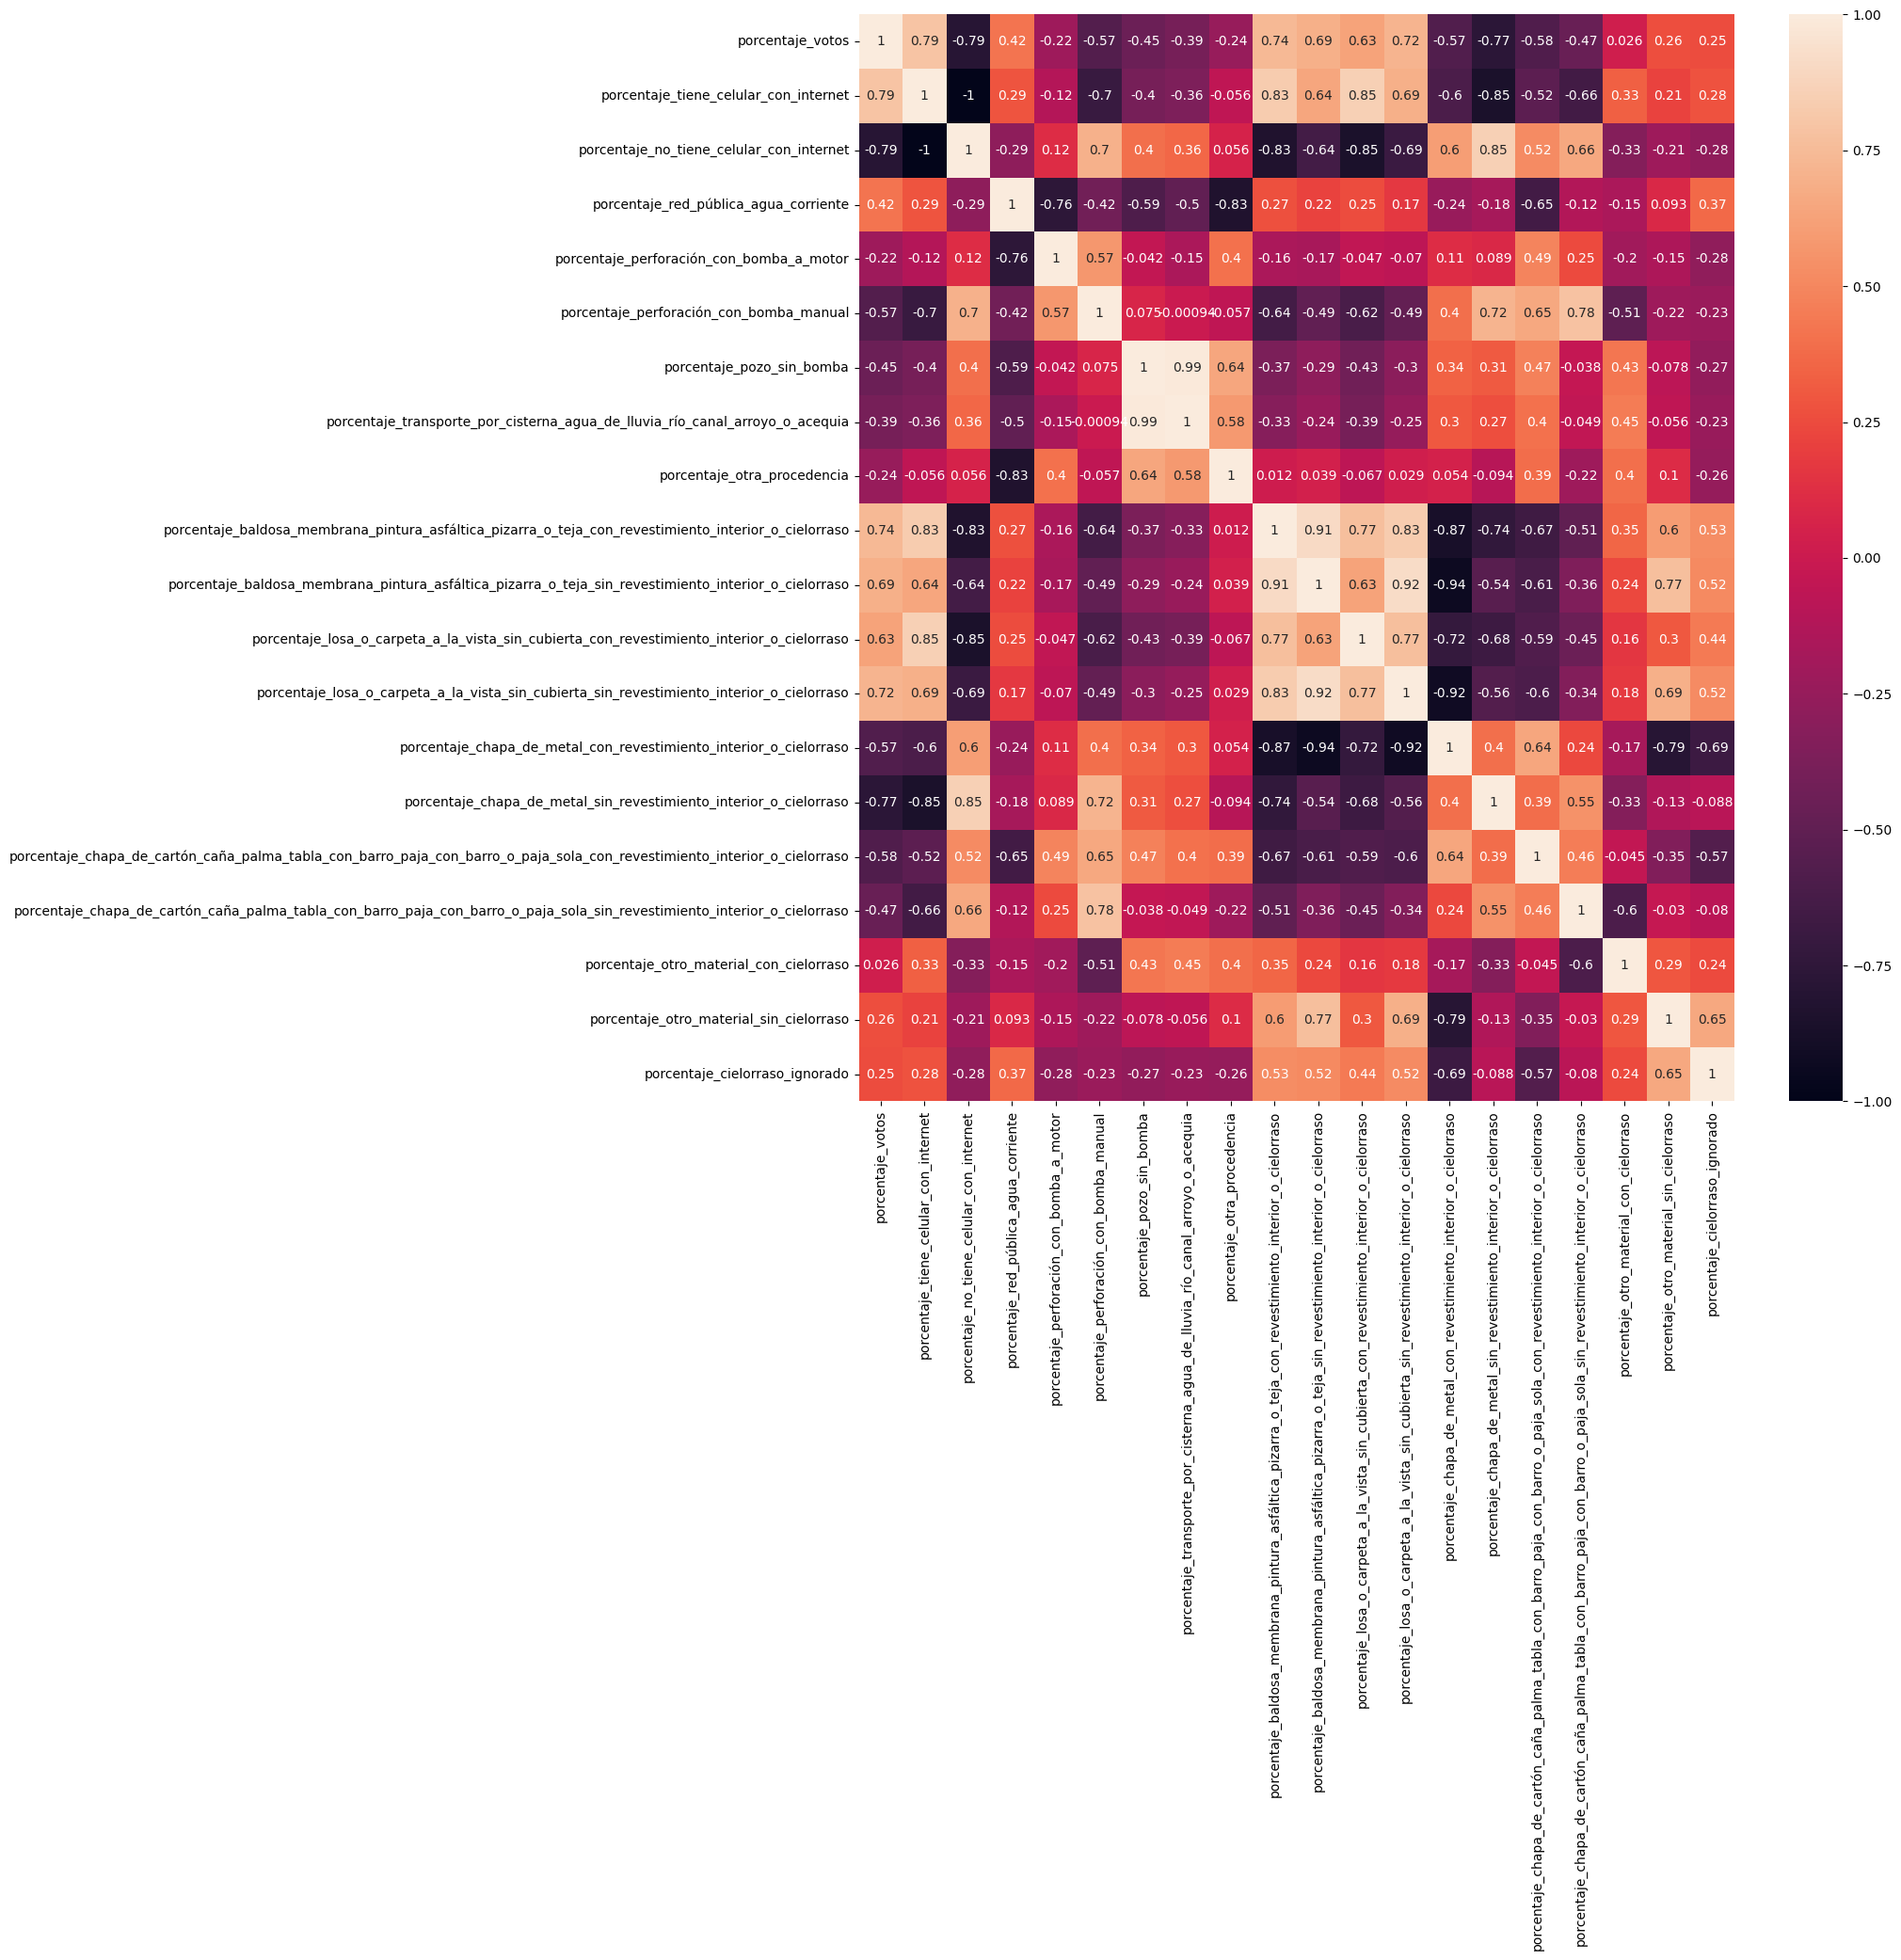

In [25]:
# Ajustamos el tamaño de la figura (ancho, alto)
plt.figure(figsize=(15, 15))

# Generamos el mapa de calor
sns.heatmap(data[['porcentaje_votos', 
                  'porcentaje_tiene_celular_con_internet',
                  'porcentaje_no_tiene_celular_con_internet',
                  'porcentaje_red_pública_agua_corriente',
                  'porcentaje_perforación_con_bomba_a_motor',
                  'porcentaje_perforación_con_bomba_manual', 
                  'porcentaje_pozo_sin_bomba',
                  'porcentaje_transporte_por_cisterna_agua_de_lluvia_río_canal_arroyo_o_acequia',
                  'porcentaje_otra_procedencia',
                  'porcentaje_baldosa_membrana_pintura_asfáltica_pizarra_o_teja_con_revestimiento_interior_o_cielorraso',
                  'porcentaje_baldosa_membrana_pintura_asfáltica_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso',
                  'porcentaje_losa_o_carpeta_a_la_vista_sin_cubierta_con_revestimiento_interior_o_cielorraso',
                  'porcentaje_losa_o_carpeta_a_la_vista_sin_cubierta_sin_revestimiento_interior_o_cielorraso',
                  'porcentaje_chapa_de_metal_con_revestimiento_interior_o_cielorraso',
                  'porcentaje_chapa_de_metal_sin_revestimiento_interior_o_cielorraso',
                  'porcentaje_chapa_de_cartón_caña_palma_tabla_con_barro_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso',
                  'porcentaje_chapa_de_cartón_caña_palma_tabla_con_barro_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso',
                  'porcentaje_otro_material_con_cielorraso',
                  'porcentaje_otro_material_sin_cielorraso',
                  'porcentaje_cielorraso_ignorado']].corr(), annot=True)

# Mostramos la figura
plt.show()

### Corrección de parámetros

#### Vemos qué hay demasiados parámetros, tienen nombres muy largos y muchos de ellos por no decir todos son inversamente proporcionales. Todos estos puntos pueden llevar a un modelo más grande y complejo de lo necesario, además de errores a la hora de ver si la variable es o no significativa, ya que hay demasiados parámetros para tan pocos valores.

#### Para simplificar el DataFrames vamos a 'dividirlo' por las categorías correspondientes a sus originales datasets.

#### Internet 

**Si tiene internet**

tiene_celular_con_internet

**No tiene internet**

no_tiene_celular_con_internet

#### Agua

**Calidad de la procedencia del agua digna**

red_pública_agua_corriente

perforación_con_bomba_a_motor

perforación_con_bomba_manual

**Calidad de la procedencia no digna**

pozo_sin_bomba

transporte_por_cisterna_agua_de_lluvia_río_canal_arroyo_o_acequia

otra_procedencia

#### Materiales

**Calidad de los materiales digna**

baldosa_membrana_pintura_asfáltica_pizarra_o_teja_con_revestimiento_interior_o_cielorraso 

losa_o_carpeta_a_la_vista_sin_cubierta_con_revestimiento_interior_o_cielorraso 

losa_o_carpeta_a_la_vista_sin_cubierta_sin_revestimiento_interior_o_cielorraso 

chapa_de_metal_con_revestimiento_interior_o_cielorraso 

baldosa_membrana_pintura_asfáltica_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso

chapa_de_metal_sin_revestimiento_interior_o_cielorraso

**Calidad de los materiales no digna**

chapa_de_cartón_caña_palma_tabla_con_barro_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso 

chapa_de_cartón_caña_palma_tabla_con_barro_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso 

otro_material_sin_cielorraso 

cielorraso_ignorado

porcentaje_otro_material_con_cielorraso 

#### Conclusión

Como las variables están inversamente relacionadas, es decir, cuando una aumenta, la otra disminuye, y viceversa, podríamos eliminar una de ella y afirmar que el incremento de una es la causa directa de la disminución de la otra. Esta correlación inversa simplificaría nuestro modelo sin perder precisión significativa.

Además, vemos que los nombres de los parámetros son muy largos, lo cual puede llevar a una peor legibilidad, menor eficiencia, es decir, al momento de escribir y revisar nombres de parámetros largos, esto puede implicar un mayor consumo de tiempo y también hacerlos más cortos ayuda a la prevención de errores, ya que los nombres largos pueden aumentar la probabilidad de cometer errores tipográficos.

Para evitar todo esto decidí agrupar por las categorías previamente mencionadas, luego calcular su porcentaje y finalmente cambiarle los nombres.

In [26]:
# Agua
data['agua_de_calidad'] = round((data['red_pública_(agua_corriente)'] + data['perforación_con_bomba_a_motor'] + data['perforación_con_bomba_manual']) / data['total'] * 100, 2)
data['agua_de_sin_calidad'] = round((data['pozo_sin_bomba'] + data['transporte_por_cisterna,_agua_de_lluvia,_río,_canal,_arroyo_o_acequia'] + data['otra_procedencia']) / data['total'] * 100, 2)

# Materiales
data['materiales_de_calidad'] = round((data['baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_con_revestimiento_interior_o_cielorraso'] + data['baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso'] + data['losa_o_carpeta_a_la_vista_(sin_cubierta)_con_revestimiento_interior_o_cielorraso'] + data['losa_o_carpeta_a_la_vista_(sin_cubierta)_sin_revestimiento_interior_o_cielorraso'] + data['chapa_de_metal_con_revestimiento_interior_o_cielorraso'] + data['chapa_de_metal_sin_revestimiento_interior_o_cielorraso']) / data['total'] * 100, 2)
data['materiales_de_sin_calidad'] = round((data['chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso'] + data['chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso'] + data['otro_material_con_cielorraso'] + data['otro_material_sin_cielorraso'] + data['cielorraso_ignorado']) / data['total'] * 100, 2)

In [27]:
data = data.rename(columns={
    'porcentaje_votos': 'votos',
    'porcentaje_tiene_celular_con_internet': 'internet',
    'porcentaje_no_tiene_celular_con_internet': 'no_internet'
})

#### Vemos como quedaron las columnas 

In [28]:
data.columns

Index(['votos_cantidad', 'votos_padron', 'votos', 'total_x',
       'tiene_celular_con_internet', 'no_tiene_celular_con_internet',
       'total_y', 'red_pública_(agua_corriente)',
       'perforación_con_bomba_a_motor', 'perforación_con_bomba_manual',
       'pozo_sin_bomba',
       'transporte_por_cisterna,_agua_de_lluvia,_río,_canal,_arroyo_o_acequia',
       'otra_procedencia', 'total',
       'baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_con_revestimiento_interior_o_cielorraso',
       'baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso',
       'losa_o_carpeta_a_la_vista_(sin_cubierta)_con_revestimiento_interior_o_cielorraso',
       'losa_o_carpeta_a_la_vista_(sin_cubierta)_sin_revestimiento_interior_o_cielorraso',
       'chapa_de_metal_con_revestimiento_interior_o_cielorraso',
       'chapa_de_metal_sin_revestimiento_interior_o_cielorraso',
       'chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_con_re

#### Hay demasiadas columnas que son redundantes o directamente no nos sirven así que las elimino 

In [29]:
columns_to_drop = ['votos_cantidad', 
                   'votos_padron',  
                   'total_x',
                   'tiene_celular_con_internet', 
                   'no_tiene_celular_con_internet',
                   'total_y', 
                   'red_pública_(agua_corriente)',
                   'perforación_con_bomba_a_motor', 
                   'perforación_con_bomba_manual',
                   'pozo_sin_bomba',
                   'transporte_por_cisterna,_agua_de_lluvia,_río,_canal,_arroyo_o_acequia',
                   'otra_procedencia', 
                   'baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_con_revestimiento_interior_o_cielorraso',
                   'baldosa,_membrana,_pintura_asfáltica,_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso',
                   'losa_o_carpeta_a_la_vista_(sin_cubierta)_con_revestimiento_interior_o_cielorraso',
                   'losa_o_carpeta_a_la_vista_(sin_cubierta)_sin_revestimiento_interior_o_cielorraso',
                   'chapa_de_metal_con_revestimiento_interior_o_cielorraso',
                   'chapa_de_metal_sin_revestimiento_interior_o_cielorraso',
                   'chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso',
                   'chapa_de_cartón,_caña,_palma,_tabla_con_barro,_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso',
                   'otro_material_con_cielorraso', 
                   'otro_material_sin_cielorraso',
                   'cielorraso_ignorado', 
                   'porcentaje_red_pública_agua_corriente',
                   'porcentaje_perforación_con_bomba_a_motor',
                   'porcentaje_perforación_con_bomba_manual', 
                   'porcentaje_pozo_sin_bomba',
                   'porcentaje_transporte_por_cisterna_agua_de_lluvia_río_canal_arroyo_o_acequia',
                   'porcentaje_otra_procedencia',
                   'porcentaje_baldosa_membrana_pintura_asfáltica_pizarra_o_teja_con_revestimiento_interior_o_cielorraso',
                   'porcentaje_baldosa_membrana_pintura_asfáltica_pizarra_o_teja_sin_revestimiento_interior_o_cielorraso',
                   'porcentaje_losa_o_carpeta_a_la_vista_sin_cubierta_con_revestimiento_interior_o_cielorraso',
                   'porcentaje_losa_o_carpeta_a_la_vista_sin_cubierta_sin_revestimiento_interior_o_cielorraso',
                   'porcentaje_chapa_de_metal_con_revestimiento_interior_o_cielorraso',
                   'porcentaje_chapa_de_metal_sin_revestimiento_interior_o_cielorraso',
                   'porcentaje_chapa_de_cartón_caña_palma_tabla_con_barro_paja_con_barro_o_paja_sola_con_revestimiento_interior_o_cielorraso',
                   'porcentaje_chapa_de_cartón_caña_palma_tabla_con_barro_paja_con_barro_o_paja_sola_sin_revestimiento_interior_o_cielorraso',
                   'porcentaje_otro_material_con_cielorraso',
                   'porcentaje_otro_material_sin_cielorraso',
                   'porcentaje_cielorraso_ignorado']


data = data.drop(columns=columns_to_drop)




#### Visualización del Dataframe limpio

In [30]:
data

,votos,total,internet,no_internet,agua_de_calidad,agua_de_sin_calidad,materiales_de_calidad,materiales_de_sin_calidad
seccion_nombre,,,,,,,,
9_de_Julio,67.95,30942,85.88,14.12,44.83,55.17,94.43,5.57
Belgrano,76.85,48544,92.41,7.59,97.14,2.86,94.35,5.65
Caseros,76.00,86261,91.12,8.88,94.36,5.64,94.67,5.33
Castellanos,75.51,189464,92.95,7.05,94.65,5.35,95.20,4.80
Constitución,77.09,93000,90.49,9.51,98.30,1.70,94.24,5.76
Garay,68.51,24853,85.70,14.30,98.21,1.79,93.12,6.88
General_López,75.25,200455,91.80,8.20,93.99,6.01,93.99,6.01
General_Obligado,73.72,197533,87.28,12.72,97.66,2.34,93.45,6.55
Iriondo,76.39,73636,91.36,8.64,94.86,5.14,93.35,6.65


#### Hago nuevamente un gráfico HeatMap para tener ver como quedaron los datos.

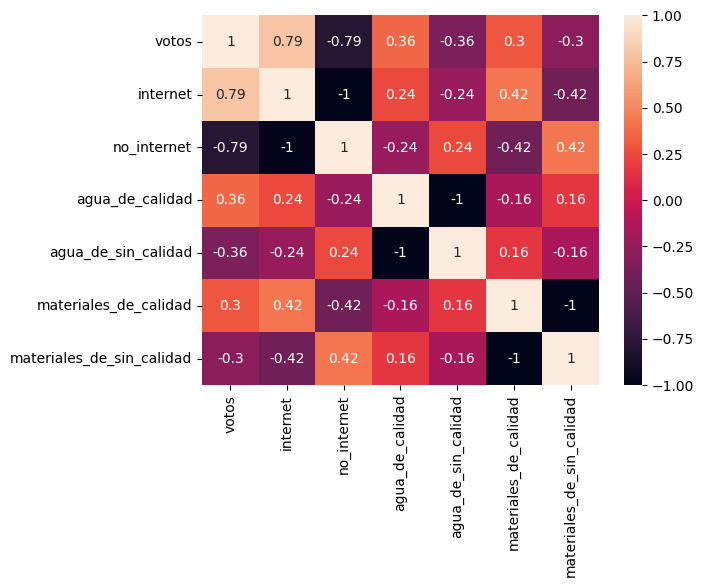

In [31]:
# Generamos el mapa de calor
sns.heatmap(data[['votos', 
                  'internet',
                  'no_internet',
                  'agua_de_calidad',
                  'agua_de_sin_calidad',
                  'materiales_de_calidad',
                  'materiales_de_sin_calidad']].corr(), annot=True)

# Mostramos la figura
plt.show()

#### Grado de asociacion lineal:

**Positiva**

votos - internet (0.79)

votos - agua_de_calidad (0.36)

votos - materiales_de_calidad (0.30)


**Negativa** 

votos - no_internet (-0.79)

votos - agua_de_sin_calidad (-0.36)

votos - materiales_de_sin_calidad (-0.30)

#### Como podemos ver, la conclusión a la que llegue anteriormente es correcta, ya que por ejemplo las variables `internet` y `no_internet` son inversamente proporcionales 

### Agregar un parámetro cualitativo

#### Ya que en mis datasets no hay ningún parámetro cualitativo y son todos cuantitativos, decidí implementar uno. En este caso el parámetro a ser implementado serán las zonas Norte, Este, Oeste, Centro y Sur.

#### Para tener una idea visual de esto hice un gráfico de los departamentos de Santa Fe y otro donde están los mismos con su correspondiente zona.

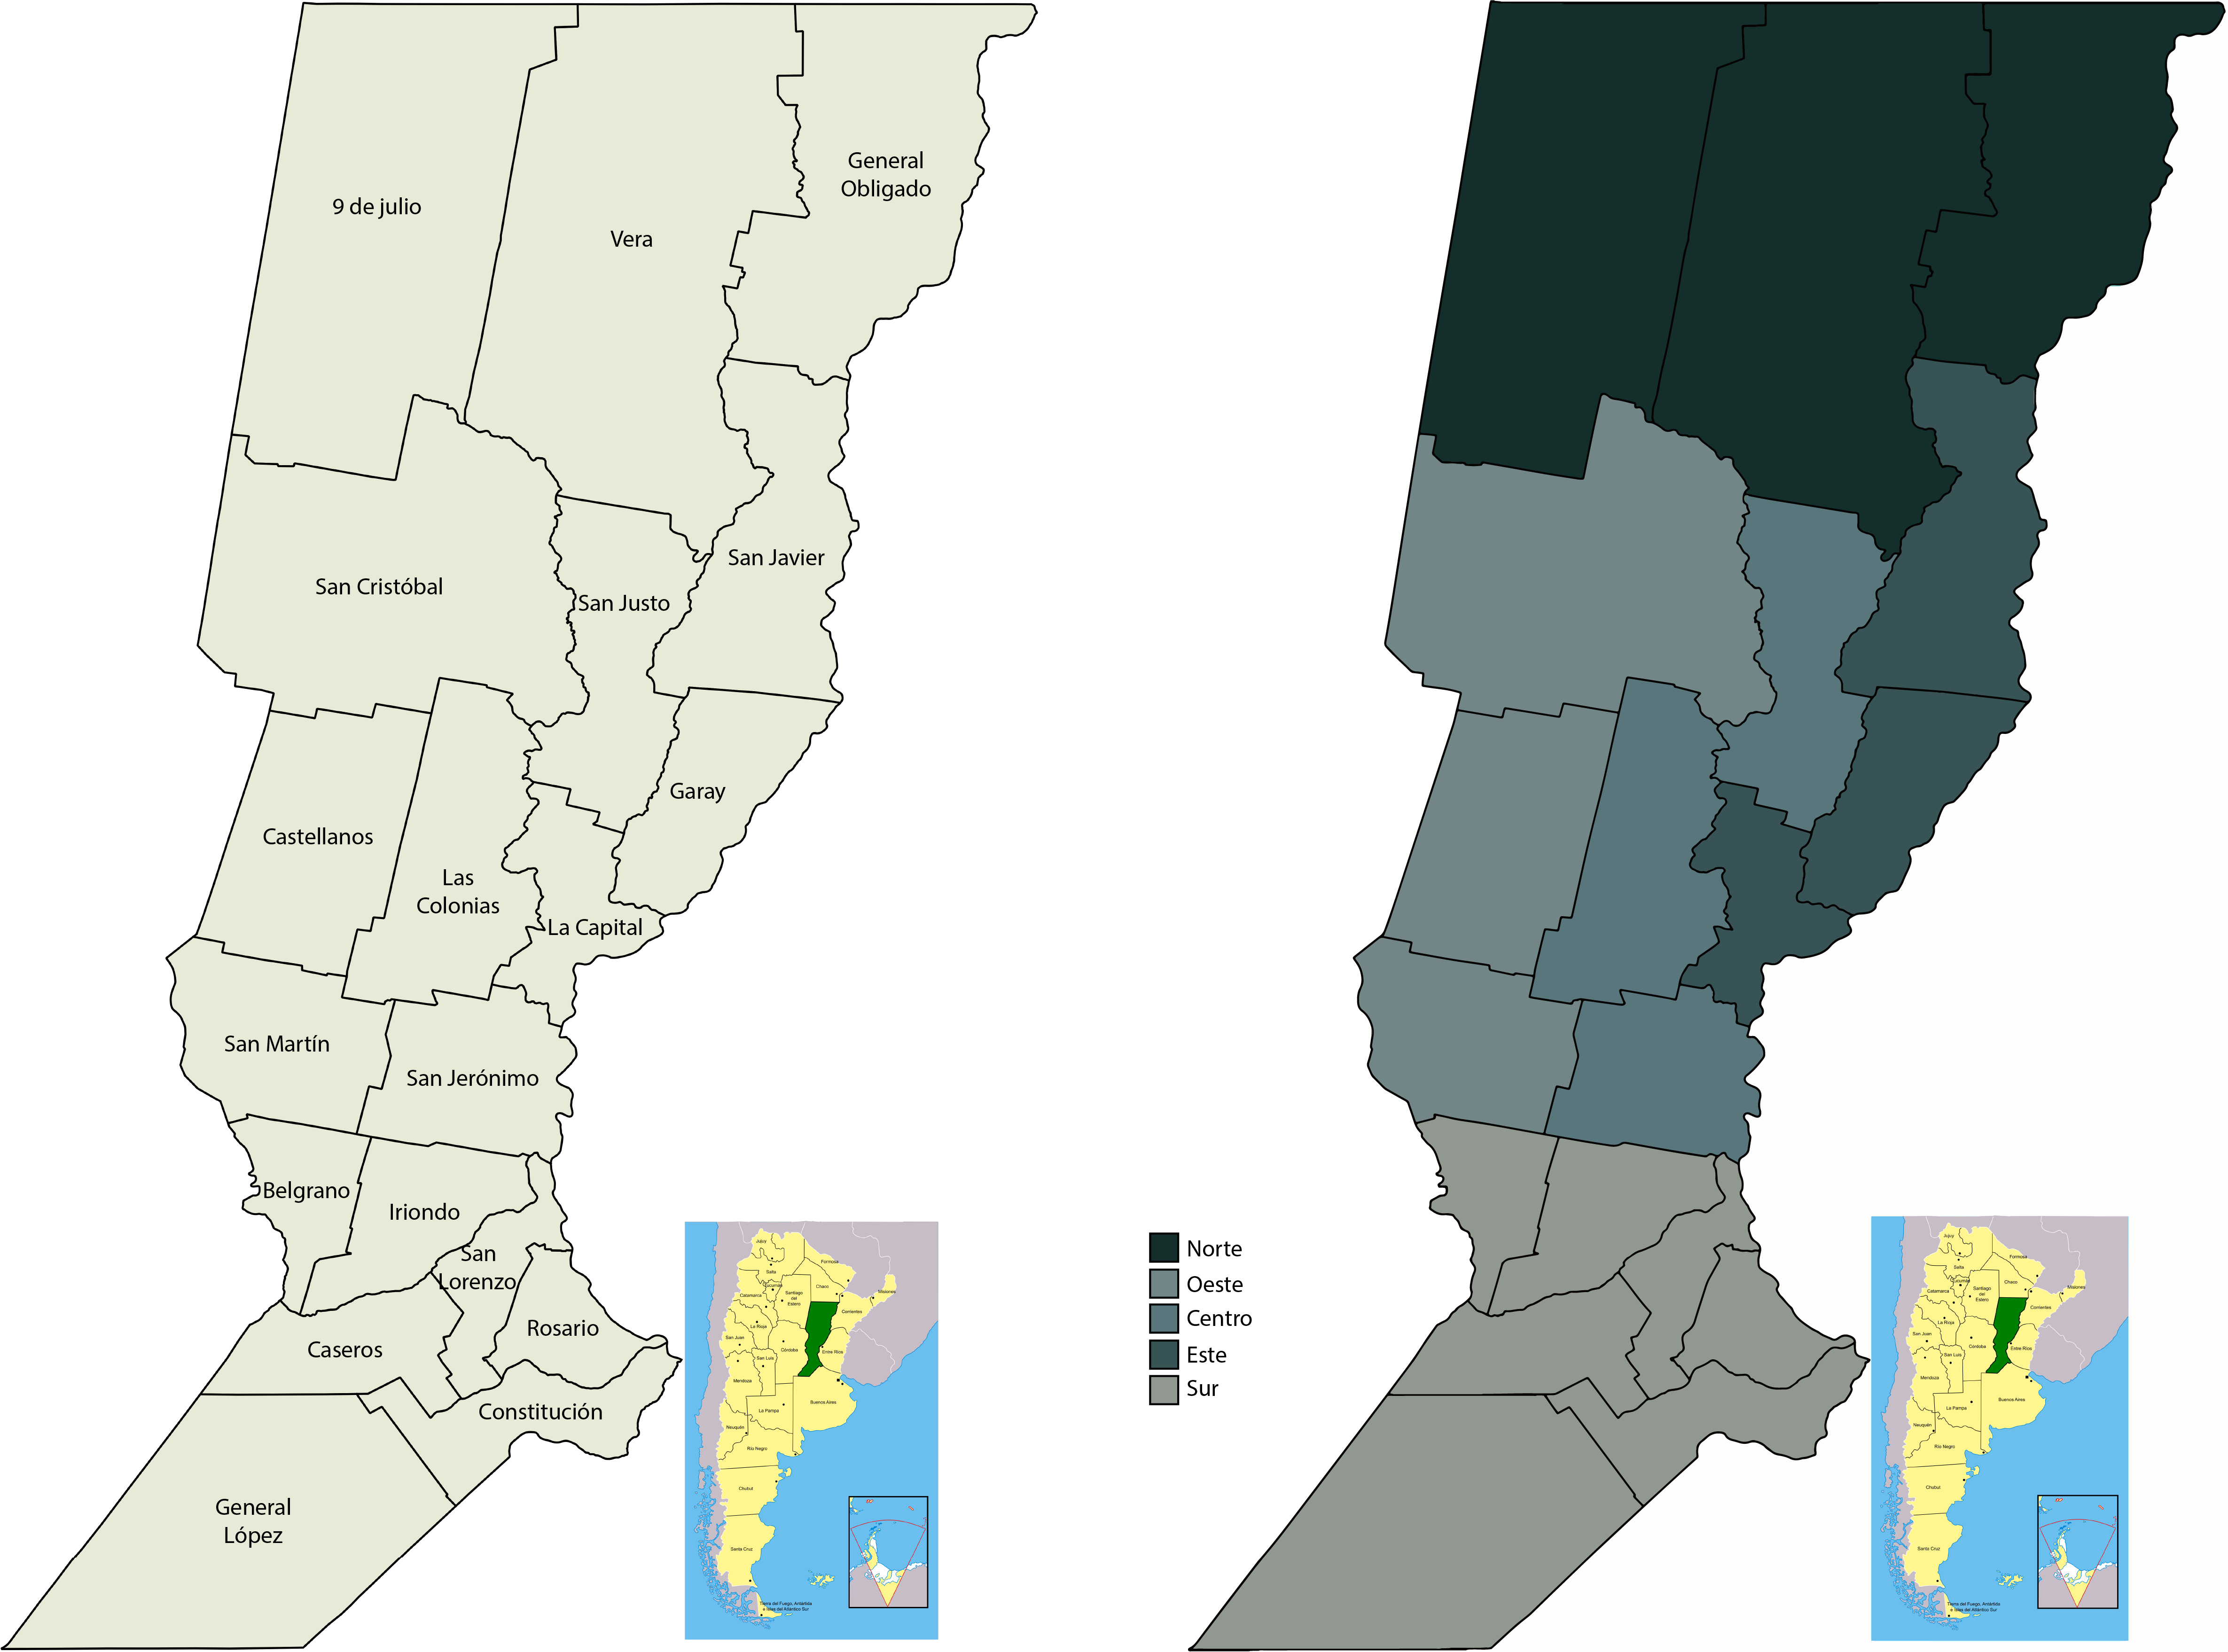

In [32]:
# Crear un diccionario con los departamentos y sus zonas correspondientes
zonas = {
        '9_de_Julio': 'Norte', 
        'Vera': 'Norte', 
        'General_Obligado': 'Norte',
        
        'San_Cristóbal': 'Oeste',
        'Castellanos': 'Oeste',
        'San_Martín': 'Oeste',
        
        'San_Justo': 'Centro',
        'San_Jerónimo': 'Centro',
        'Las_Colonias': 'Centro',
        
        'San_Javier': 'Este',
        'Garay': 'Este',
        'La_Capital': 'Este',
        
        'Belgrano': 'Sur',
        'Iriondo': 'Sur',
        'Caseros': 'Sur',
        'San_Lorenzo': 'Sur',
        'Rosario': 'Sur',
        'Constitución': 'Sur',
        'General_López': 'Sur'
}
data['zona'] = data.index.to_series().map(zonas)

### Graficos

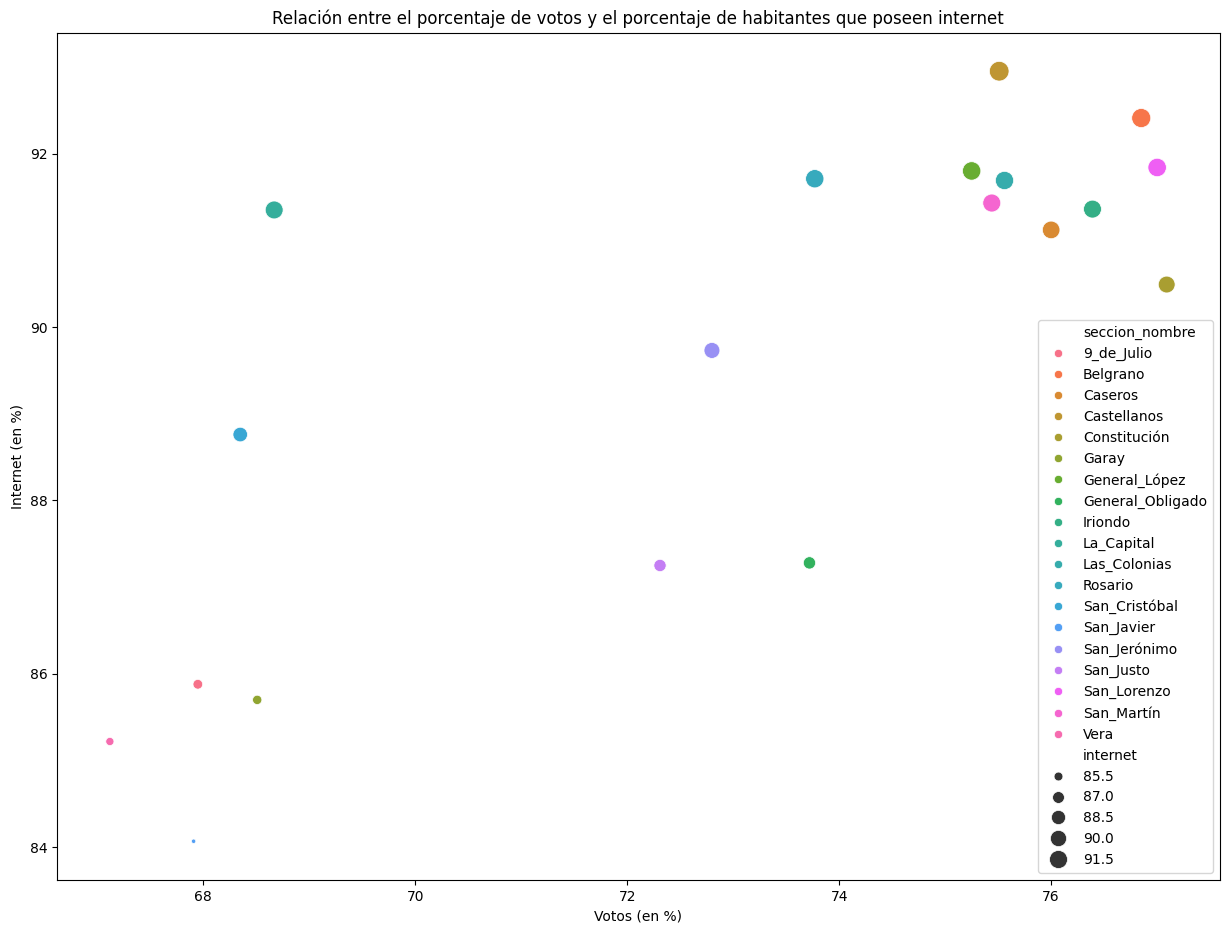

In [33]:
plt.figure(figsize=(15, 11))
sns.scatterplot(data=data, x='votos', y='internet', hue='seccion_nombre', size='internet', sizes=(10, 200))
plt.title('Relación entre el porcentaje de votos y el porcentaje de habitantes que poseen internet')
plt.xlabel('Votos (en %)')
plt.ylabel('Internet (en %)')
plt.legend(loc='lower right')
plt.show()

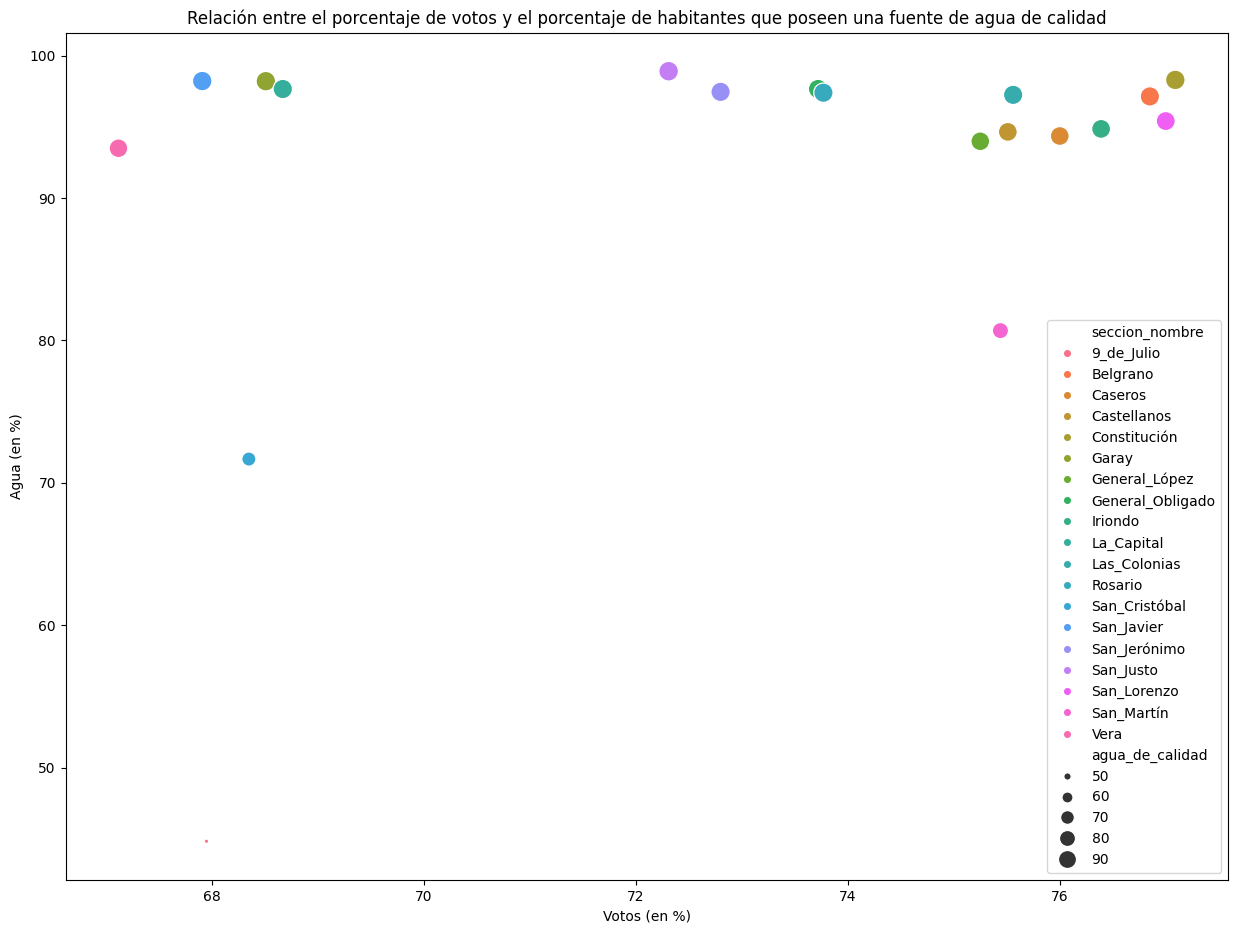

In [34]:
plt.figure(figsize=(15, 11))
sns.scatterplot(data=data, x='votos', y='agua_de_calidad', hue='seccion_nombre', size='agua_de_calidad', sizes=(10, 200))
plt.title('Relación entre el porcentaje de votos y el porcentaje de habitantes que poseen una fuente de agua de calidad')
plt.xlabel('Votos (en %)')
plt.ylabel('Agua (en %)')
plt.legend(loc='lower right')
plt.show()

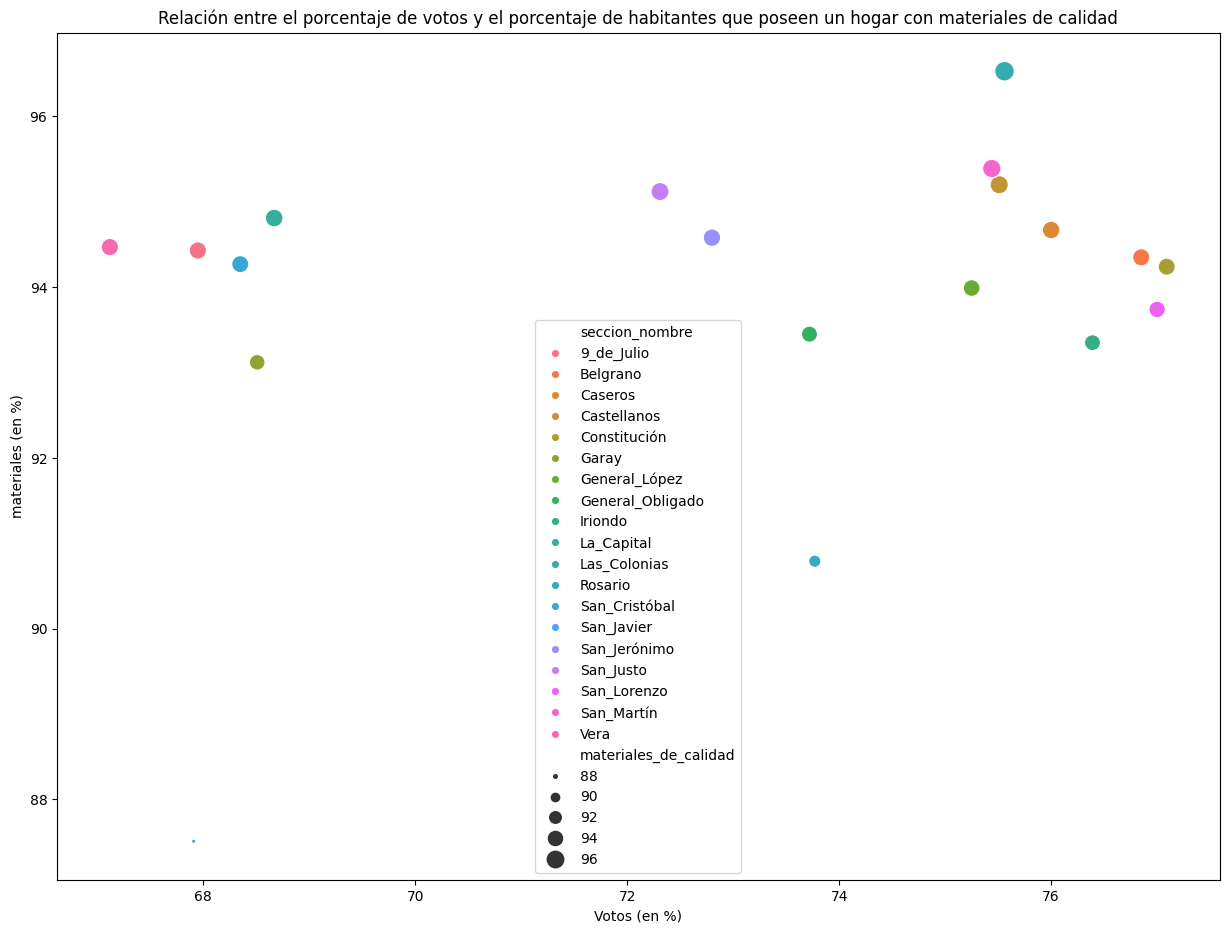

In [35]:
plt.figure(figsize=(15, 11))
sns.scatterplot(data=data, x='votos', y='materiales_de_calidad', hue='seccion_nombre', size='materiales_de_calidad', sizes=(10, 200))
plt.title('Relación entre el porcentaje de votos y el porcentaje de habitantes que poseen un hogar con materiales de calidad')
plt.xlabel('Votos (en %)')
plt.ylabel('materiales (en %)')
plt.legend(loc='lower center')
plt.show()

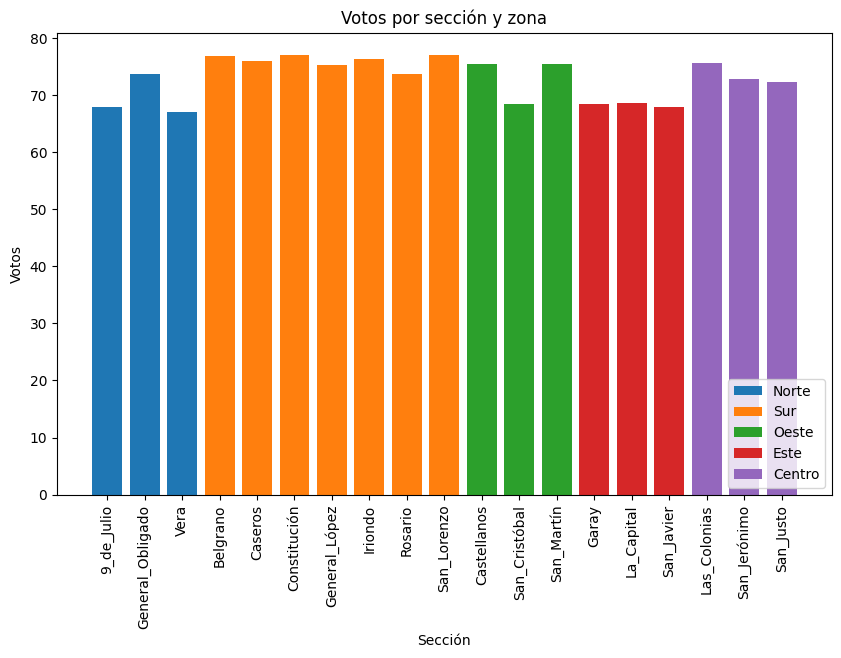

In [36]:
plt.figure(figsize=(10, 6))
for zona in data['zona'].unique():
    plt.bar(data[data['zona'] == zona].index, data[data['zona'] == zona]['votos'], label=zona)
plt.title('Votos por sección y zona')
plt.xlabel('Sección')
plt.ylabel('Votos')
plt.legend(loc='lower right')
plt.xticks(rotation=90)
plt.show()

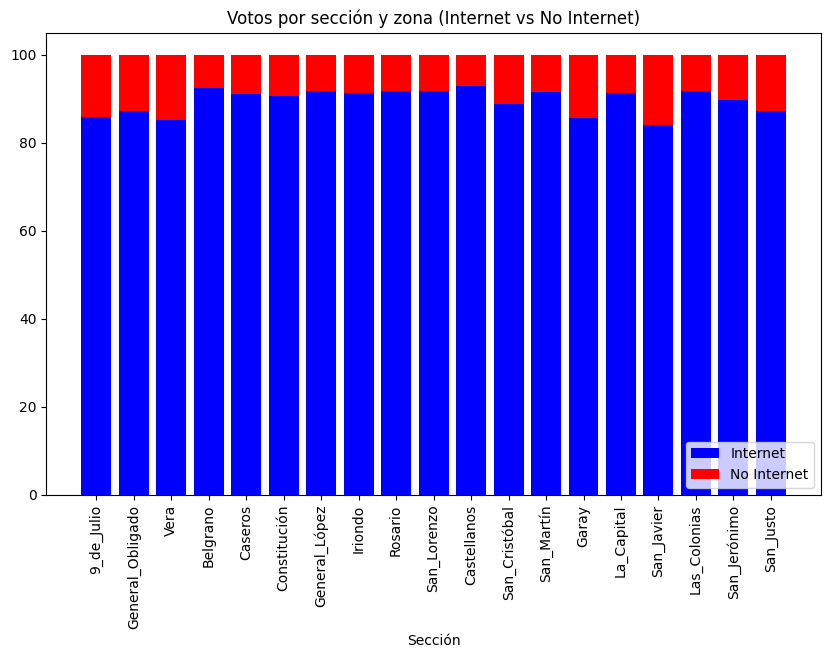

In [37]:
plt.figure(figsize=(10, 6))

for zona in data['zona'].unique():
    bar_internet = plt.bar(data[data['zona'] == zona].index, data[data['zona'] == zona]['internet'], color='blue')
    bar_no_internet = plt.bar(data[data['zona'] == zona].index, data[data['zona'] == zona]['no_internet'], bottom=data[data['zona'] == zona]['internet'], color='red')

plt.xlabel('Sección')
plt.title('Votos por sección y zona (Internet vs No Internet)')
plt.legend(['Internet', 'No Internet'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

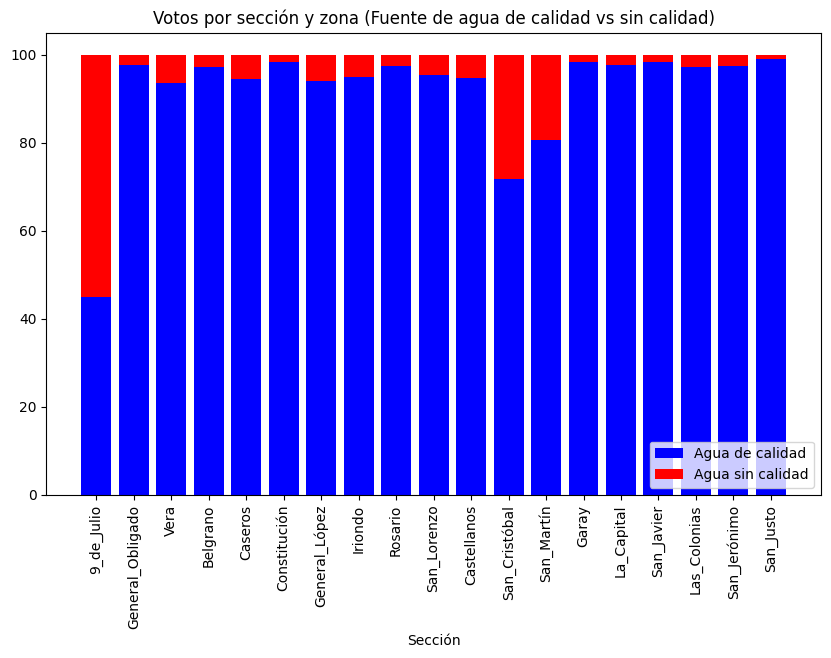

In [38]:
plt.figure(figsize=(10, 6))

for zona in data['zona'].unique():
    bar_internet = plt.bar(data[data['zona'] == zona].index, data[data['zona'] == zona]['agua_de_calidad'], color='blue')
    bar_no_internet = plt.bar(data[data['zona'] == zona].index, data[data['zona'] == zona]['agua_de_sin_calidad'], bottom=data[data['zona'] == zona]['agua_de_calidad'], color='red')

plt.xlabel('Sección')
plt.title('Votos por sección y zona (Fuente de agua de calidad vs sin calidad)')
plt.legend(['Agua de calidad', 'Agua sin calidad'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

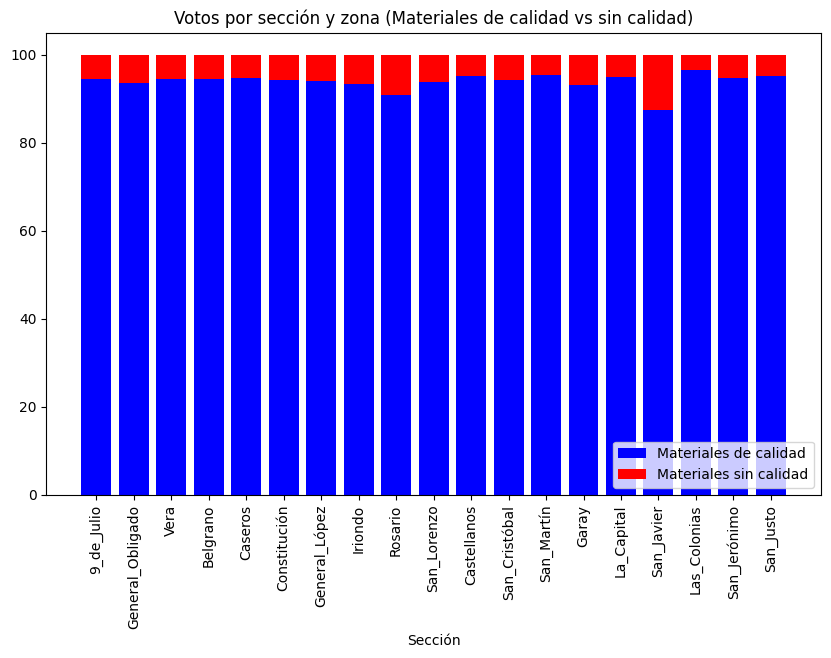

In [39]:
plt.figure(figsize=(10, 6))

for zona in data['zona'].unique():
    bar_internet = plt.bar(data[data['zona'] == zona].index, data[data['zona'] == zona]['materiales_de_calidad'], color='blue')
    bar_no_internet = plt.bar(data[data['zona'] == zona].index, data[data['zona'] == zona]['materiales_de_sin_calidad'], bottom=data[data['zona'] == zona]['materiales_de_calidad'], color='red')

plt.xlabel('Sección')
plt.title('Votos por sección y zona (Materiales de calidad vs sin calidad)')
plt.legend(['Materiales de calidad', 'Materiales sin calidad'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

# PARTE 2

## Dummies

#### Para poder incluir las variables cualitativas en el modelo, hay que transformarlas en dummies. Esto lo puede hacer automáticamente o manualmente.

In [40]:
dummies_zonas = pd.get_dummies(data['zona'])
dummies_zonas = dummies_zonas.astype(int)
dummies_zonas.rename(columns={'Norte': 'norte_dummie', 'Este': 'este_dummie', 'Centro': 'centro_dummie', 'Oeste': 'oeste_dummie', 'Sur': 'sur_dummie'}, inplace=True)
dummies_zonas

,centro_dummie,este_dummie,norte_dummie,oeste_dummie,sur_dummie
seccion_nombre,,,,,
9_de_Julio,0,0,1,0,0
Belgrano,0,0,0,0,1
Caseros,0,0,0,0,1
Castellanos,0,0,0,1,0
Constitución,0,0,0,0,1
Garay,0,1,0,0,0
General_López,0,0,0,0,1
General_Obligado,0,0,1,0,0
Iriondo,0,0,0,0,1


In [41]:
data = pd.concat([data, dummies_zonas], axis=1)
data

,votos,total,internet,no_internet,agua_de_calidad,agua_de_sin_calidad,materiales_de_calidad,materiales_de_sin_calidad,zona,centro_dummie,este_dummie,norte_dummie,oeste_dummie,sur_dummie
seccion_nombre,,,,,,,,,,,,,,
9_de_Julio,67.95,30942,85.88,14.12,44.83,55.17,94.43,5.57,Norte,0,0,1,0,0
Belgrano,76.85,48544,92.41,7.59,97.14,2.86,94.35,5.65,Sur,0,0,0,0,1
Caseros,76.00,86261,91.12,8.88,94.36,5.64,94.67,5.33,Sur,0,0,0,0,1
Castellanos,75.51,189464,92.95,7.05,94.65,5.35,95.20,4.80,Oeste,0,0,0,1,0
Constitución,77.09,93000,90.49,9.51,98.30,1.70,94.24,5.76,Sur,0,0,0,0,1
Garay,68.51,24853,85.70,14.30,98.21,1.79,93.12,6.88,Este,0,1,0,0,0
General_López,75.25,200455,91.80,8.20,93.99,6.01,93.99,6.01,Sur,0,0,0,0,1
General_Obligado,73.72,197533,87.28,12.72,97.66,2.34,93.45,6.55,Norte,0,0,1,0,0
Iriondo,76.39,73636,91.36,8.64,94.86,5.14,93.35,6.65,Sur,0,0,0,0,1


## Modelo
Variable a predecir: PPF(probabilidad de participación futura)

Variables independientes: internet, agua_de_calidad, materiales_de_calidad y zona

$ PPF = b_0 + b_{internet} * internet + b_{agua de calidad} * agua de calidad + b_{materiales de calidad} * materiales de calidad + b_{zona} * zona $

In [42]:
#modelo = smf.ols('votos ~ internet + agua_de_calidad + materiales_de_calidad + norte_dummie + este_dummie + centro_dummie + oeste_dummie + sur_dummie', data)
modelo = smf.ols('votos ~ internet + agua_de_calidad + materiales_de_calidad + zona', data)
re_modelo = modelo.fit()
re_modelo.summary()  

c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votos   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     6.812
Date:                Fri, 15 Dec 2023   Prob (F-statistic):            0.00275
Time:                        19:09:38   Log-Likelihood:                -35.149
No. Observations:                  19   AIC:                             86.30
Df Residuals:                      11   BIC:                             93.85
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.8922     31.318      0.539      0.600     -52.039      85.823
zona[T.Este]             -3.7842      1.992     -1.900      0.084      -8.169       0.600
zona[T.Norte]            -0.7531      2.037     -0.370      0.719      -5.236       3.730
zona[T.Oeste]            -0.1329      1.974     -0.067      0.948      -4.478       4.212
zona[T.Sur]               1.6314      1.884      0.866      0.405      -2.515       5.778
internet                  0.5289      0.351      1.507      0.160      -0.244       1.301
agua_de_calidad           0.0708      0.047      1.520      0.157      -0.032       0.173
materiales_de_calidad     0.0248      0.383      0.065      0.950      -0.818       0.868
==============================================================================
Omnibus:                        1.908   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.584
Skew:                          -0.636   Prob(JB):                        0.453
Kurtosis:                       2.381   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusiones y observaciones 

#### No encontré ninguna variable significativa al nivel del 5%, ya que todas tenían un valor p superior a 0.05. Sin embargo, al ajustar el nivel de significancia al 16%, algunas variables mostraron un valor p menor a 0.16, por lo que las consideré significativas bajo este criterio más flexible

## Modelo reajustado

Variable a predecir: PPF(probabilidad de participación futura)

Variables independientes: internet y zona

$ PPF = b_0 + b_{internet} * internet + b_{zona} * zona $

In [43]:
modelo_ajustado = smf.ols('votos ~ internet + zona', data)
re_modelo_ajustado = modelo_ajustado.fit()
re_modelo_ajustado.summary()  

c:\Users\src4\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votos   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     8.820
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           0.000775
Time:                        19:09:38   Log-Likelihood:                -36.996
No. Observations:                  19   AIC:                             85.99
Df Residuals:                      13   BIC:                             91.66
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        18.1872     25.354      0.717      0.486     -36.586      72.961
zona[T.Este]     -3.6374      1.819     -2.000      0.067      -7.567       0.292
zona[T.Norte]    -1.8394      1.935     -0.951      0.359      -6.019       2.340
zona[T.Oeste]    -1.3779      1.726     -0.798      0.439      -5.107       2.351
zona[T.Sur]       1.2715      1.521      0.836      0.418      -2.015       4.558
internet          0.6183      0.283      2.186      0.048       0.007       1.229
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.373
Skew:                          -0.170   Prob(JB):                        0.830
Kurtosis:                       2.403   Cond. No.                     4.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observaciones

#### Coeficientes

**Zonas**

Con respecto al centro:

- El Norte de la provincia de Santa Fe tiene 1.8394 menos de participación

- El Este tiene 3.6374 menos de participación

- El Oeste tiene 1.3779  menos de participación

- El Sur tiene 1.2715 más de participación

**Internet**

Cada vez que el porcentaje de personas con internet aumenta un 1% en un departamento, el porcentaje de participación aumenta un 0.6183

#### $R^2 y R^2 ajustado$

**R-squared**

- El modelo tiene un R-cuadrado de 0.772, lo que indica que aproximadamente el 77.2% de la variabilidad en los votos se puede explicar por las variables independientes (internet y zona).


**Adj. R-squared**

- Sin embargo, tuve más en consideración el R-cuadrado ajustado de 0.685, lo que indica que aproximadamente el 68.5% de la variabilidad en los votos se puede explicar por las variables independientes (internet y zona). Tuve más en consideración este porque este estadístico ajusta el R-cuadrado en función del número de predictores en el modelo. A diferencia del R-cuadrado, el R-cuadrado ajustado puede disminuir si se agregan predictores que no mejoran el modelo. Por lo tanto, es una medida más precisa de la calidad del modelo, especialmente cuando se comparan modelos con diferentes números de predictores. Esto ayuda a evitar el sobre ajuste que puede surgir al agregar demasiadas variables al modelo.

#### p-value

- internet: El valor p es 0.048, lo que es menor que 0.16. Esto indica que la variable internet es estadísticamente significativa en la predicción de los votos.

- zona[T.Este]: El valor p es 0.067, lo que es mayor que 0.05 pero menor que 0.16. Esto indica que, según tu umbral, la variable zona[T.Este] es estadísticamente significativa en la predicción de los votos.

- zona[T.Norte], zona[T.Oeste], zona[T.Sur]: Los valores p son mayores que 0.16, lo que indica que estas variables no son estadísticamente significativas en la predicción de los votos, según tu umbral.

### Conclusión

En el modelo, la disponibilidad de internet es un predictor significativo de la participación en las elecciones, con un aumento del 1% en la disponibilidad de internet, que se traduce en un aumento del 61% en la participación. Sin embargo, las zonas no parecen ser predictores fuertes. El modelo puede explicar aproximadamente el 68.5% de la variabilidad en la participación electoral. Por lo tanto, parece posible predecir la participación en futuras elecciones basándonos en tendencias electorales anteriores y factores socioeconómicos, aunque si se quiere validar aún más los resultados se necesitaría más análisis de más datos, como por ejemplo departamentos de otras provincias o que los datasets del censo contengan información más detallada como por ejemplo por ciudad.

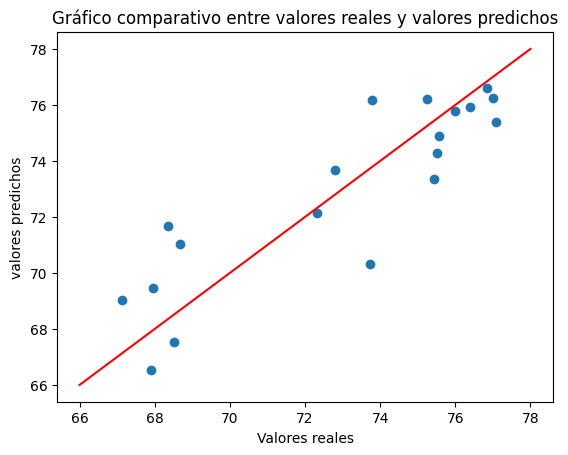

In [47]:
plt.scatter(data['votos'], re_modelo_ajustado.predict(data[['internet', 'zona']]))
plt.plot([66,78], [66,78], color = 'red') 
plt.xlabel('Valores reales')
plt.ylabel('valores predichos')
plt.title("Gráfico comparativo entre valores reales y valores predichos")
plt.show()